In [14]:
import pandas as pd

In [15]:
#Load dataset
#Load the data and merge the datasets
#Load the Datasets
profile_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_acs_file.csv", skiprows= 1)
acs_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_profile_simplified.csv")

print("Profile Columns", profile_df.columns.to_list())
print("ACS Columns", acs_df.columns.to_list())

Profile Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'public_caf', 'public_ef', 'public_emp', 'public_gs', 'public_hf', 'public_psef', 'public_srf', 'walk_caf', 'walk_ef', 'walk_emp', 'walk_gs', 'walk_hf', 'walk_psef', 'walk_srf', 'ada_code_n', 'ADA_code']
ACS Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'PRNAME', 'ada_code_n', 'ADA_code', 'T1527', 'T1528', 'T1529', 'T1530', 'T1531', 'T1532', 'T1533', 'T1534', 'T1535', 'T1536', 'T1537', 'T1538', 'T1539', 'T1540', 'T1541', 'T1542', 'T1543', 'T1544', 'T1545', 'T1546', 'T1547', 'T1548', 'T1549', 'T1550', 'T1551', 'T1552', 'T1553', 'T1554', 'T1555', 'T1556', 'T1557', 'T1558', 'T1559', 'T1560', 'T1561', 'T1562', 'T1563', 'T1564', 'T1565', 'T1566', 'T1567', 'T1568', 'T1569', 'T1570', 'T1571', 'T1572', 'T1573', 'T1574', 'T1575', 'T1576', 'T1577', 'T1578', 'T1579', 'T1580', 'T1581', 'T1582', 'T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1595', 'T1596', 'T1597', 'T1598'

In [18]:
acs_df.head

<bound method NDFrame.head of                                                 CMANAME  CMAUID  \
0     Moderate metropolitan influenced zone (N.L.) /...     997   
1                                            St. John's       1   
2     Weak metropolitan influenced zone (N.L.) / Zon...     998   
3                                            St. John's       1   
4                                            St. John's       1   
...                                                 ...     ...   
5428  Territories (outside CAs, Nvt.) / Territoires ...       0   
5429  Territories (outside CAs, Nvt.) / Territoires ...       0   
5430  Territories (outside CAs, Nvt.) / Territoires ...       0   
5431  Territories (outside CAs, Nvt.) / Territoires ...       0   
5432  Territories (outside CAs, Nvt.) / Territoires ...       0   

                         CSDNAME   CSDUID  \
0       Division No.  1, Subd. E  1001304   
1                     Pouch Cove  1001505   
2       Division No.  1, Subd.

In [19]:
# 2) Merge on ADA_code
#Merge Datasets on ADA_code
df = pd.merge(profile_df, acs_df, on='ADA_code', how='inner')

#Please work lol
df.head()

,CMANAME_x,CMAUID_x,CSDNAME_x,CSDUID_x,public_caf,public_ef,public_emp,public_gs,public_hf,public_psef,...,W1673,W1674,W1675,W1676,W1677,W1678,W1679,W1680,W1681,W1682
0,Weak metropolitan influenced zone (N.L.) / Zon...,998,Old Perlican,1001343,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,20.0,0.0,10.0,0.0,0.0,0.0,10.0
1,St. John's,1,Pouch Cove,1001505,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Weak metropolitan influenced zone (N.L.) / Zon...,998,"Division No. 1, Subd. I",1001374,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,55.0,0.0,15.0,0.0,0.0,0.0,25.0
3,St. John's,1,St. John's,1001519,0.008549,0.008819,0.008912,24.173913,0.008047,0.016364,...,80.0,50.0,0.0,400.0,0.0,100.0,15.0,45.0,0.0,235.0
4,St. John's,1,Torbay,1001509,0.000000,0.000000,0.000131,NaN,0.000138,0.000000,...,35.0,0.0,0.0,80.0,0.0,10.0,10.0,0.0,0.0,55.0


In [31]:
df = df.rename(columns={
    'public_hf':   'access_hf',
    'public_srf':  'access_srf',
    'public_psef': 'access_psef'
})

stpaul = df[df['CSDNAME_x'].str.contains(r"St\. Paul", case=False, na=False)].copy()

# 3) Compute the 0–1 accessibility index summary
summary = stpaul[['access_hf', 'access_srf', 'access_psef']].describe().round(3)

# 4) Print it out
print("St Paul Accessibility Indices (0 = worst, 1 = best):\n", summary)

St Paul Accessibility Indices (0 = worst, 1 = best):
        access_hf  access_srf  access_psef
count      4.000       4.000        4.000
mean       0.001       0.002        0.000
std        0.002       0.003        0.001
min        0.000       0.000        0.000
25%        0.000       0.000        0.000
50%        0.000       0.000        0.000
75%        0.001       0.002        0.000
max        0.004       0.006        0.001


In [24]:
# 1) Filter your merged df to Edmonton CMAs
edmonton = df[df['CMANAME_x'].str.contains("Edmonton", case=False, na=False)].copy()

# 2) Compute descriptive stats on the same indices
ed_summary = edmonton[['access_hf', 'access_srf', 'access_psef']] \
                 .describe() \
                 .round(3)

print("Edmonton Accessibility Indices (0=worst, 1=best):\n", ed_summary)


Edmonton Accessibility Indices (0=worst, 1=best):
        access_hf  access_srf  access_psef
count    138.000     138.000      136.000
mean       0.061       0.032        0.024
std        0.052       0.025        0.021
min        0.000       0.000        0.000
25%        0.019       0.013        0.009
50%        0.054       0.029        0.020
75%        0.095       0.049        0.034
max        0.209       0.099        0.085


In [25]:
import matplotlib.pyplot as plt

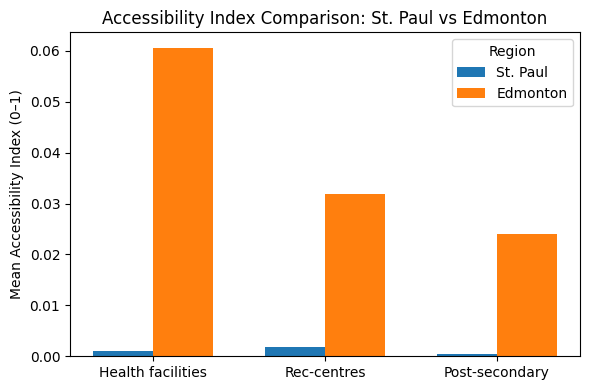

In [26]:
# 5) Compute means of each index
services = ['access_hf','access_srf','access_psef']
labels   = ['Health facilities','Rec-centres','Post-secondary']
sp_means = [stpaul[s].mean()   for s in services]
ed_means = [edmonton[s].mean() for s in services]

# 6) Plot a grouped bar chart
x     = list(range(len(services)))
width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
ax.bar([i - width/2 for i in x], sp_means, width, label='St. Paul')
ax.bar([i + width/2 for i in x], ed_means, width, label='Edmonton')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Accessibility Index (0–1)')
ax.set_title('Accessibility Index Comparison: St. Paul vs Edmonton')
ax.legend(title='Region')

plt.tight_layout()
plt.show()

In [50]:
'public_gs' in df.columns

True

In [33]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt

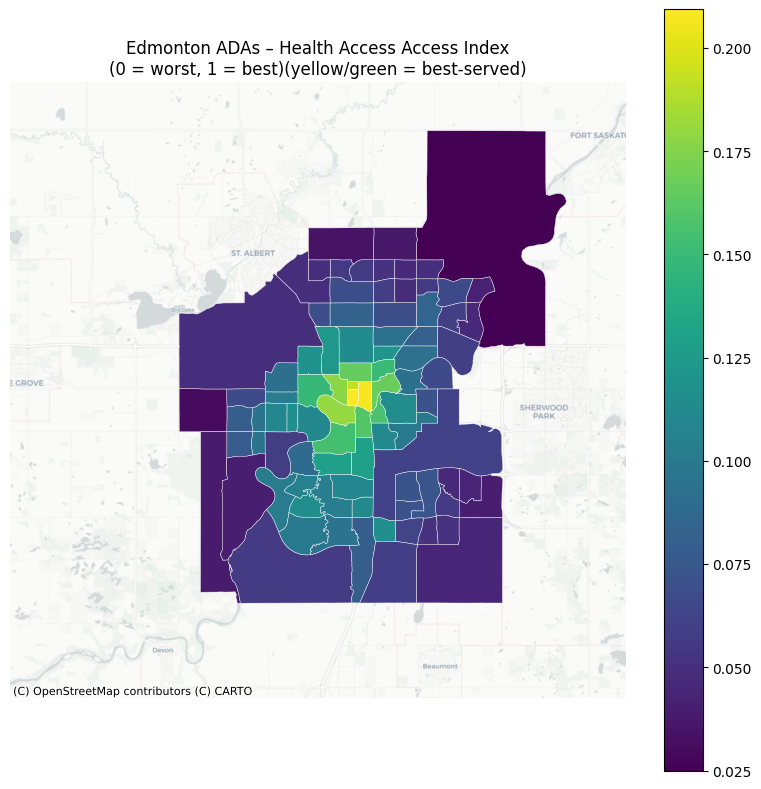

In [90]:
# 1) Ensure your df["ADA_code"] is an 8-char string
df["ADA_code"] = df["ADA_code"].astype(str).str.zfill(8)

# 2) Read the ADA shapefile (all .shp/.dbf/.shx together)
ada_geo = gpd.read_file(
    "/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp"
)

# 3) Subset to Alberta and project to Web Mercator
ada_ab = ada_geo[ada_geo["PRUID"] == "48"].to_crs(epsg=3857)

# 4) Create the same join key on the geometry side
ada_ab["ADA_code"] = ada_ab["ADAUID"].astype(str).str.zfill(8)

# 5) Merge in your transit‐access indices & CMA name
gdf = ada_ab.merge(
    df[[
        "ADA_code",
        "access_hf",
        "access_srf",
        "access_psef",
        "CSDNAME_x"     # use whatever your CMA‐column is named
    ]],
    on="ADA_code",
    how="left"
)

# 6) Filter to Edmonton CMAs
gdf_ed = gdf[
    gdf["CSDNAME_x"].str.contains("Edmonton", case=False, na=False)
].copy()
fig, ax = plt.subplots(figsize=(8, 8))
gdf_ed.plot(
    column="access_hf",      # your health‐access index
    cmap="viridis",          # continuous viridis colormap
    legend=True,             # show color‐bar
    edgecolor="white",
    linewidth=0.3,
    ax=ax
)

# add a basemap underneath (optional)
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    crs=gdf_ed.crs,
    reset_extent=False
)

ax.set_title("Edmonton ADAs – Health Access Access Index\n(0 = worst, 1 = best)(yellow/green = best‑served)")
ax.axis("off")
plt.tight_layout()
plt.show()

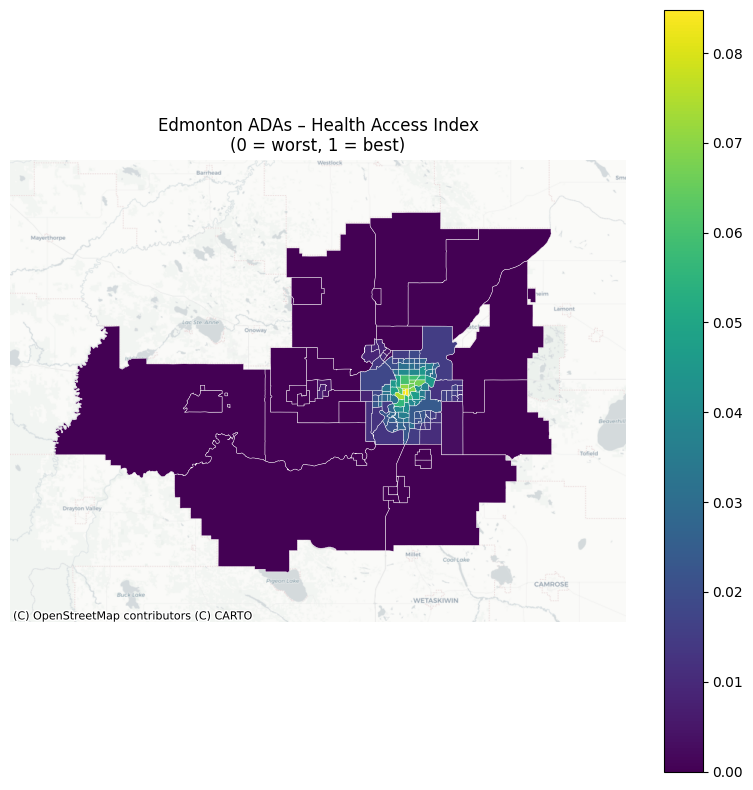

In [53]:
df.rename(columns={'public_gs': 'access_gs'}, inplace=True)
df.head()

,CMANAME_x,CMAUID_x,CSDNAME_x,CSDUID_x,public_caf,public_ef,public_emp,access_gs,access_hf,access_psef,...,W1676,W1677,W1678,W1679,W1680,W1681,W1682,clinic_min,rec_min,ps_min
0,Weak metropolitan influenced zone (N.L.) / Zon...,998,Old Perlican,1001343,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,20.0,0.0,10.0,0.0,0.0,0.0,10.0,0.000000,0.000000,0.000000
1,St. John's,1,Pouch Cove,1001505,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,Weak metropolitan influenced zone (N.L.) / Zon...,998,"Division No. 1, Subd. I",1001374,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,55.0,0.0,15.0,0.0,0.0,0.0,25.0,0.000000,0.000000,0.000000
3,St. John's,1,St. John's,1001519,0.008549,0.008819,0.008912,24.173913,0.008047,0.016364,...,400.0,0.0,100.0,15.0,45.0,0.0,235.0,0.482827,0.712038,0.981824
4,St. John's,1,Torbay,1001509,0.000000,0.000000,0.000131,NaN,0.000138,0.000000,...,80.0,0.0,10.0,10.0,0.0,0.0,55.0,0.008278,0.010509,0.000000


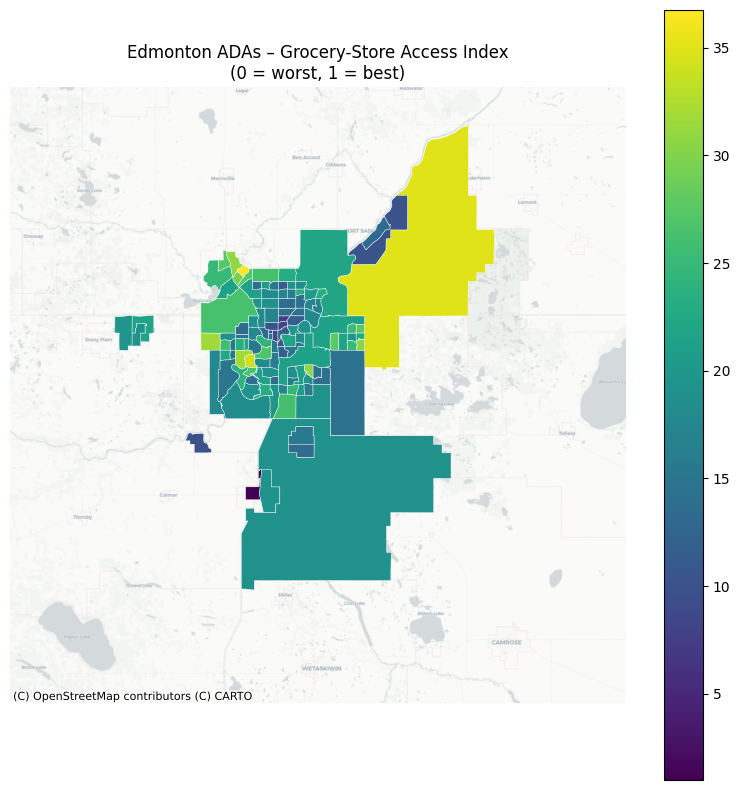

In [54]:
ada_ab  = ada_geo[ada_geo['PRUID']=='48'].to_crs(3857)
ada_ab['ADA_code'] = ada_ab['ADAUID'].astype(str).str.zfill(8)

# 3) Merge in access_gs + CMA name
gdf = ada_ab.merge(
    df[['ADA_code','access_gs','CMANAME_x']],
    on='ADA_code', how='left'
)

# 4) Filter to Edmonton CMAs
gdf_ed = gdf[gdf['CMANAME_x'].str.contains("Edmonton", case=False, na=False)].copy()

# 5) Plot the grocery-store access index
fig, ax = plt.subplots(figsize=(8,8))
gdf_ed.plot(
    column='access_gs',     # grocery-store access
    cmap='viridis',
    legend=True,
    edgecolor='white', linewidth=0.3,
    ax=ax
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_ed.crs, reset_extent=False)
ax.set_title("Edmonton ADAs – Grocery-Store Access Index\n(0 = worst, 1 = best)")
ax.axis('off')
plt.tight_layout()
plt.show()

Alberta Accessibility Indices (0 = worst, 1 = best):
        access_hf  access_srf  access_psef
count    526.000     525.000      519.000
mean       0.039       0.036        0.016
std        0.052       0.048        0.020
min        0.000       0.000        0.000
25%        0.000       0.000        0.000
50%        0.011       0.012        0.006
75%        0.062       0.060        0.027
max        0.264       0.258        0.088


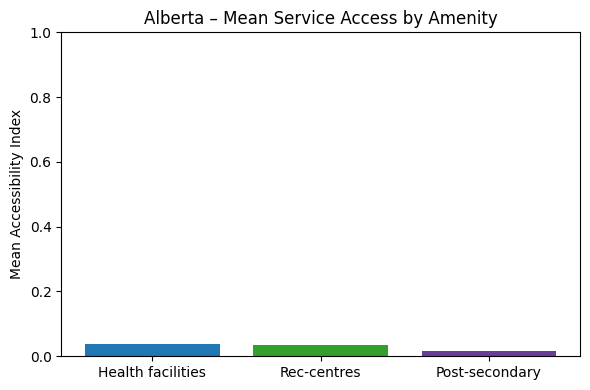

In [55]:
# 1) Filter your merged df to Alberta
ab = df[df["PRNAME"] == "Alberta"].copy()

# 2) Compute 0–1 index summaries
summary_ab = ab[["access_hf","access_srf","access_psef"]].describe().round(3)
print("Alberta Accessibility Indices (0 = worst, 1 = best):\n", summary_ab)

# 3) Plot the provincial mean for each service
services = ["access_hf","access_srf","access_psef"]
labels   = ["Health facilities","Rec-centres","Post-secondary"]
ab_means = [ab[s].mean() for s in services]

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, ab_means, color=["#1f78b4","#33a02c","#6a3d9a"])
ax.set_ylim(0,1)
ax.set_ylabel("Mean Accessibility Index")
ax.set_title("Alberta – Mean Service Access by Amenity")
plt.tight_layout()
plt.show()

Overall access is very low

All three indices hover close to 0 on a 0–1 scale.

Even the mean values—0.039 for health facilities, 0.036 for rec-centres, and just 0.016 for post-secondary—are only a few hundredths of the “best” possible score.

Most ADAs have almost no access

25th percentile for every index is exactly 0: a quarter of Alberta’s ADAs score zero (i.e. the worst possible) for each service.

Medians are also extremely low (0.011, 0.012, 0.006), meaning more than half of ADAs have effectively negligible proximity to clinics, rec-centres, or colleges.

Only a handful of places are relatively well-served

At the 75th percentile, health and rec-centre access climb only to about 0.06, and post-secondary to 0.027.

The absolute maximum indices (0.264 for health, 0.258 rec, 0.088 post-sec) belong to just a few very urban ADAs—everybody else is far below.

What this tells us
Rural and smaller-town ADAs in Alberta are almost entirely cut off by these public-transit/walking measures: they score near zero for each key amenity.

Urban cores (Edmonton, Calgary, etc.) dominate those high-access outliers, driving the small positive means you see in the bar chart.

Post-secondary access is worst of all, reinforcing that getting to a college or university by transit or on foot is far harder than reaching a clinic or rec-centre.

Why this matters for your story
It underlines why newcomers (and especially those without cars) tend to cluster in major cities: only there are the indexes high enough to make daily life feasible.

It also frames your personal migration narrative—choosing Edmonton—against a backdrop where most of the province simply doesn’t offer decent proximity to health, recreation or post-secondary amenities.

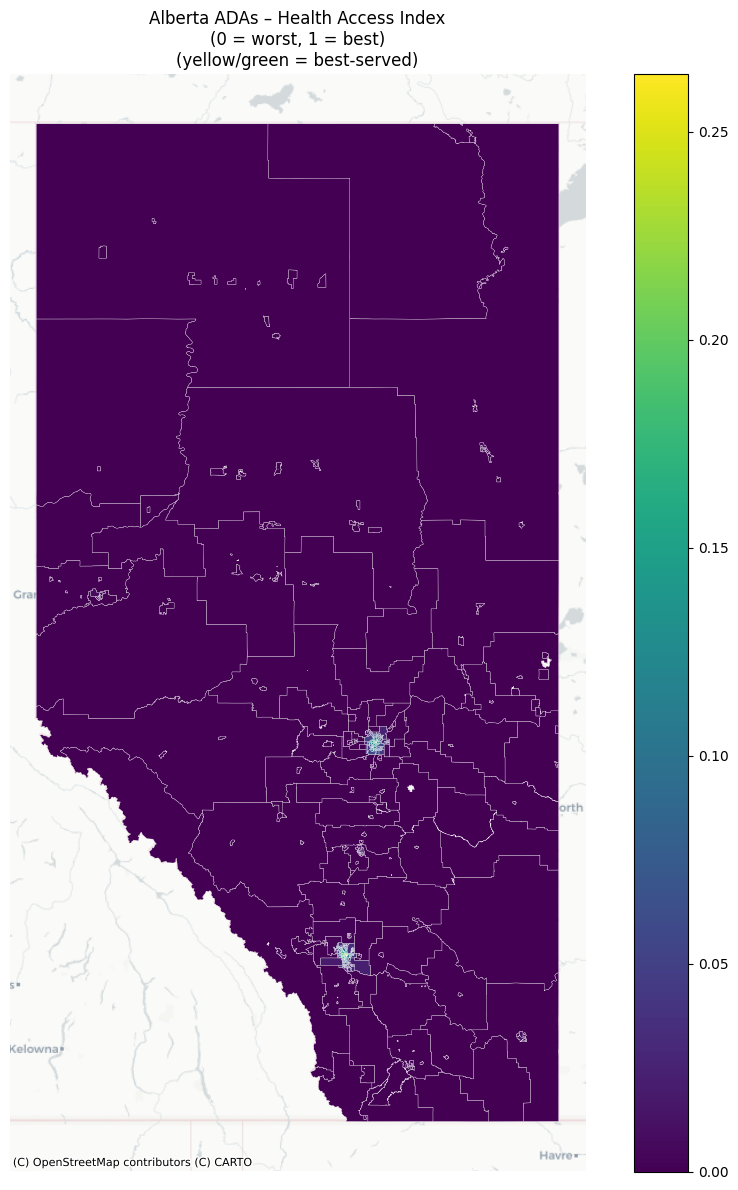

In [92]:
# 3) Merge your indices into the geodataframe
gdf_ab = ada_ab.merge(
    df[["ADA_code","access_hf","access_srf","access_psef"]],
    on="ADA_code", how="left"
)

# 4) Plot the health-access choropleth
fig, ax = plt.subplots(1,1, figsize=(10,12))
gdf_ab.plot(
    column="access_hf",
    cmap="viridis",
    legend=True,
    edgecolor="white", linewidth=0.2,
    ax=ax
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_ab.crs)
ax.set_title("Alberta ADAs – Health Access Index\n(0 = worst, 1 = best)\n(yellow/green = best‑served)")
ax.axis("off")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

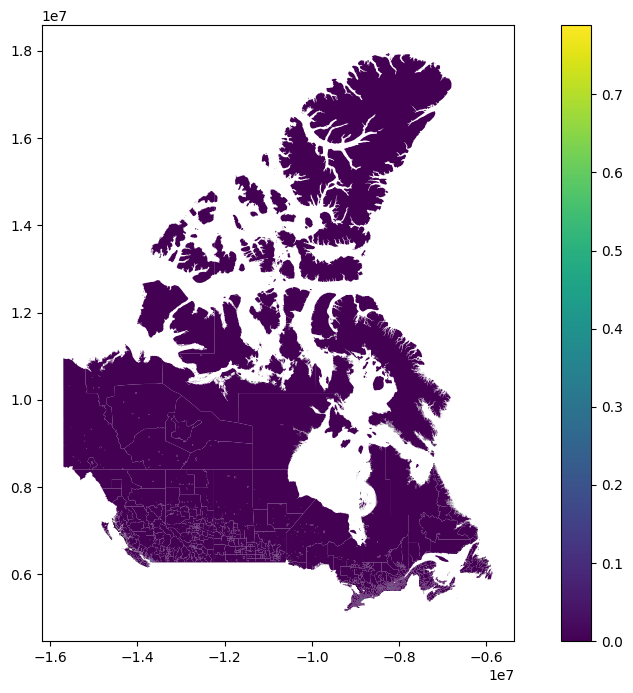

In [66]:
# 1) Make sure your attribute df has an 8-char ADA_code
df["ADA_code"] = df["ADA_code"].astype(str).str.zfill(8)

# 2) Load the full Canada ADA shapefile and reproject
ada_geo = gpd.read_file("/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp").to_crs(epsg=3857)
ada_geo["ADA_code"] = ada_geo["ADAUID"].astype(str).str.zfill(8)

# 3) Merge in your indices
gdf_can = ada_geo.merge(
    df[["ADA_code", "access_hf", "access_srf", "access_psef"]],
    on="ADA_code",
    how="left"
)

# 4) Plot Canada-wide health-access choropleth
fig, ax = plt.subplots(figsize=(12, 8))
gdf_can.plot(
    column="access_srf",         # change to access_srf or access_psef
    cmap="viridis",
    legend=True,
    edgecolor="none",
    linewidth=0,
    ax=ax
)

# 5) (Optionally) add a light basemap underneath
try:
    import contextily as cx
    cx.add_basemap(
        ax,
        source=cx.providers.CartoDB.Positron,
        crs=gdf_can.crs.to_string(),
        zoom = 11,
        reset_extent=False
    )
except ImportError:
    pass

ax.set_title("Canada ADAs – Sports and Recreational Facilities Access Index\n(0 = worst, 1 = best)")
ax.axis("off")
plt.tight_layout()
plt.show()

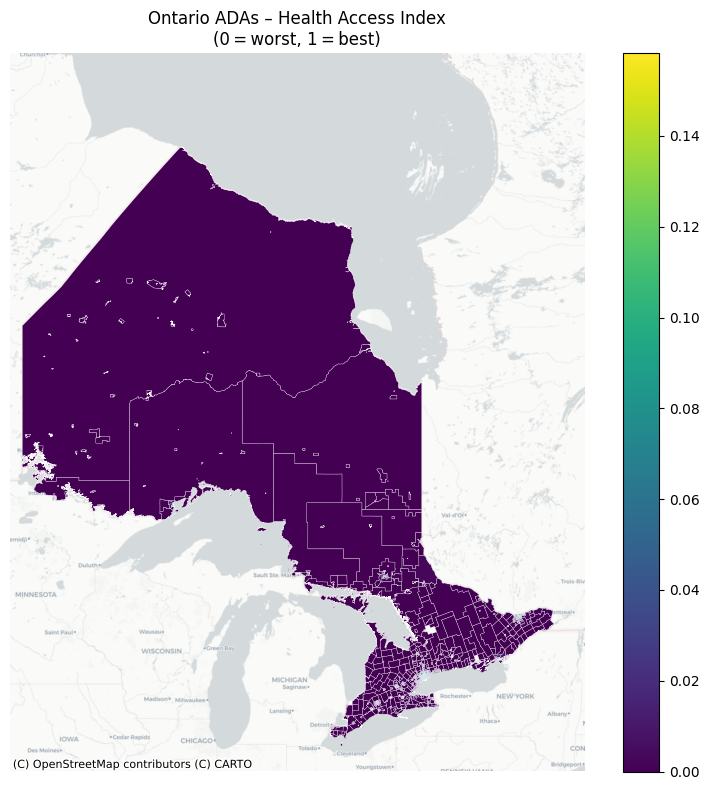

In [65]:
# 1) (Re)build your full Canada gdf, exactly as before:
ada_geo = gpd.read_file("/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp").to_crs(epsg=3857)
ada_geo["ADA_code"] = ada_geo["ADAUID"].astype(str).str.zfill(8)

gdf_can = ada_geo.merge(
    df[["ADA_code", "access_hf", "access_srf", "access_psef"]],
    on="ADA_code", how="left"
)

# 2) Filter to Ontario ADAs (PRUID == "35"):
gdf_on = gdf_can[gdf_can["PRUID"] == "35"].copy()

# 3) Compute Ontario’s Web-Mercator bounds
xmin, ymin, xmax, ymax = gdf_on.total_bounds
# Optionally pad the box by 5 km for a little breathing room:
pad = 5_000  
xmin, ymin, xmax, ymax = xmin - pad, ymin - pad, xmax + pad, ymax + pad

# 4) Plot just Ontario, colouring by health-access
fig, ax = plt.subplots(figsize=(8, 8))
gdf_on.plot(
    column="access_psef",
    cmap="viridis",
    legend=True,
    edgecolor="white",
    linewidth=0.2,
    ax=ax
)

# 5) Zoom to Ontario’s extent and add a basemap
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    crs=gdf_on.crs.to_string(),
    reset_extent=False
)

ax.set_title("Ontario ADAs – Health Access Index\n(0 = worst, 1 = best)")
ax.axis("off")
plt.tight_layout()
plt.show()

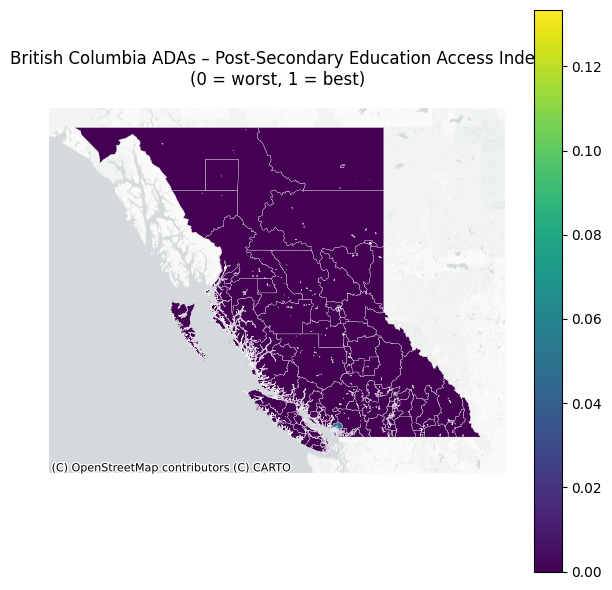

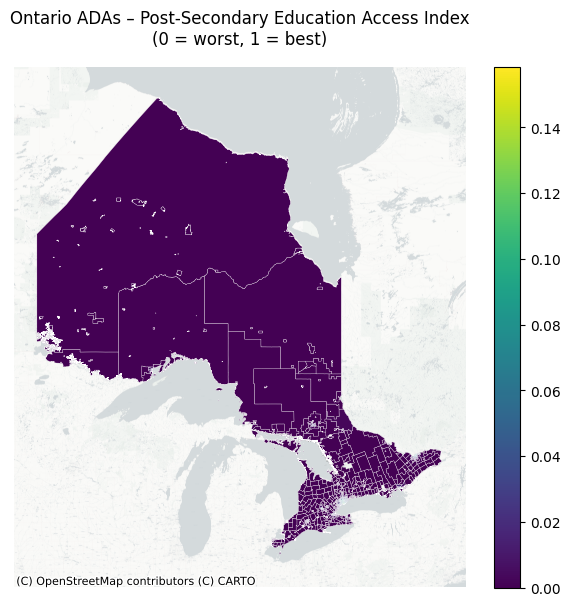

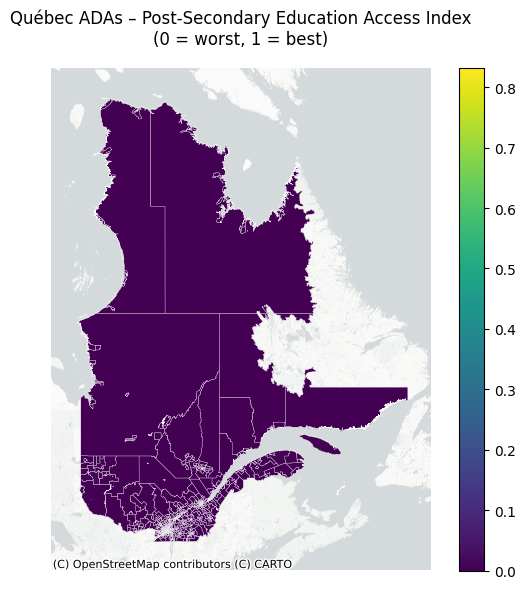

In [69]:
# 0) make sure your df has ADA_code as 8-char string
df["ADA_code"] = df["ADA_code"].astype(str).str.zfill(8)

# 1) read your national ADA shapefile once
ada_geo = gpd.read_file("/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp")

# 2) pick the service you want to map here:
service = "access_psef"   # post-secondary; switch to "access_hf" or "access_srf" as needed
titles  = {
    "access_hf":   "Health Care Facility Access Index",
    "access_srf":  "Sports & Recreation Facility Access Index",
    "access_psef": "Post-Secondary Education Access Index"
}

# 3) define provinces to loop through
provinces = [
    ("British Columbia", "59"),
    ("Ontario",            "35"),
    ("Québec",             "24"),
]

for prov_name, prov_code in provinces:
    # a) subset & reproject
    ada_pr = (
        ada_geo[ada_geo["PRUID"] == prov_code]
          .to_crs(epsg=3857)
          .copy()
    )
    # b) build join key
    ada_pr["ADA_code"] = ada_pr["ADAUID"].astype(str).str.zfill(8)

    # c) merge in your index
    gdf = ada_pr.merge(
        df[["ADA_code", service]],
        on="ADA_code",
        how="left"
    )

    # d) plot
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    gdf.plot(
        column=service,
        cmap="viridis",
        legend=True,
        edgecolor="white",
        linewidth=0.2,
        ax=ax
    )
    cx.add_basemap(
        ax,
        source=cx.providers.CartoDB.Positron,
        crs=gdf.crs,
        reset_extent=False,
        zoom=9
    )
    ax.set_title(f"{prov_name} ADAs – {titles[service]}\n(0 = worst, 1 = best)")
    ax.axis("off")
    plt.tight_layout()
    plt.show()

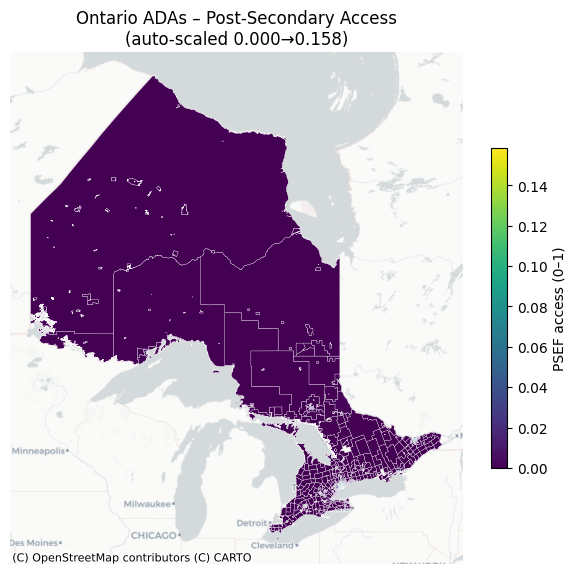

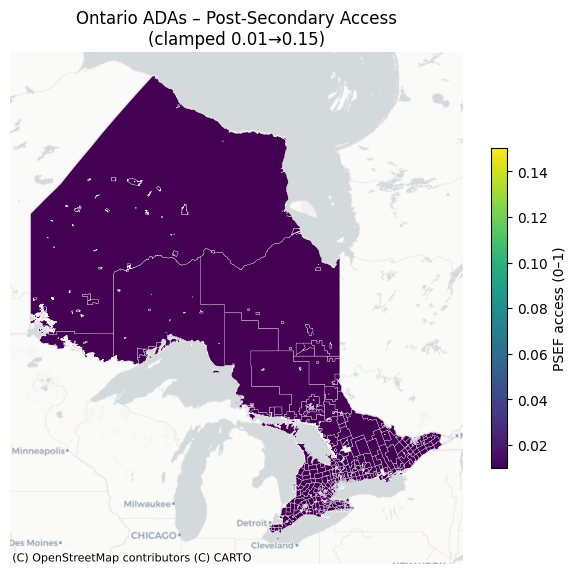

In [70]:
service = "access_psef"

# OPTION A: auto-scale per-province
vmin, vmax = gdf_on[service].min(), gdf_on[service].max()

fig, ax = plt.subplots(figsize=(6,6))
gdf_on.plot(
    column=service,
    cmap="viridis",
    vmin=vmin, vmax=vmax,
    legend=True,
    legend_kwds={"label": "PSEF access (0–1)", "shrink": 0.6},
    edgecolor="white", linewidth=0.2,
    ax=ax
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_on.crs)
ax.set_title(f"Ontario ADAs – Post-Secondary Access\n(auto-scaled {vmin:.3f}→{vmax:.3f})")
ax.axis("off")
plt.tight_layout()
plt.show()


# OPTION B: clamp low end globally
global_min, global_max = 0.01, 0.15   # pick thresholds that make sense
fig, ax = plt.subplots(figsize=(6,6))
gdf_on.plot(
    column=service,
    cmap="viridis",
    vmin=global_min, vmax=global_max,
    legend=True,
    legend_kwds={"label": "PSEF access (0–1)", "shrink": 0.6},
    edgecolor="white", linewidth=0.2,
    ax=ax
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=gdf_on.crs)
ax.set_title(f"Ontario ADAs – Post-Secondary Access\n(clamped {global_min}→{global_max})")
ax.axis("off")
plt.tight_layout()
plt.show()

In [74]:
# ---- 0) Make sure both have the same join key and types
df["ADA_code"]   = df["ADA_code"].astype(str).str.zfill(8)
gdf_can["ADA_code"] = gdf_can["ADA_code"].astype(str).str.zfill(8)

# ---- 1) Pull in the CMA labels
gdf_can = gdf_can.merge(
    df[["ADA_code","CMANAME_x"]],
    on="ADA_code",
    how="left"
)

In [75]:
gdf_can = gdf_can.to_crs(epsg=3857)


In [76]:
gdf_can.columns

Index(['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry', 'ADA_code',
       'access_hf', 'access_srf', 'access_psef', 'CMANAME_x'],
      dtype='object')

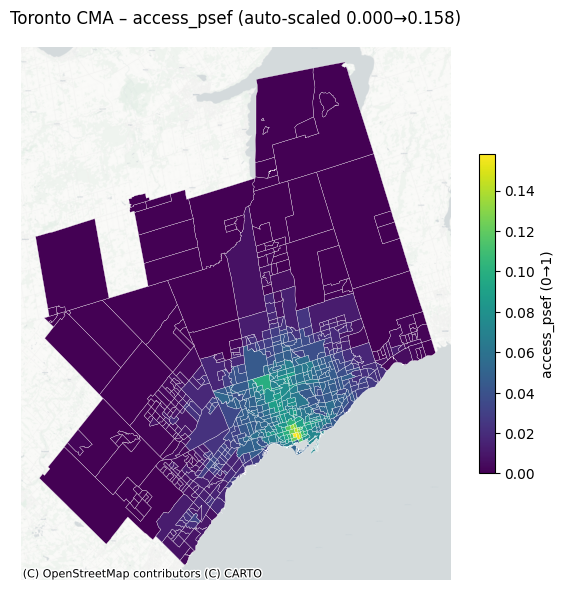

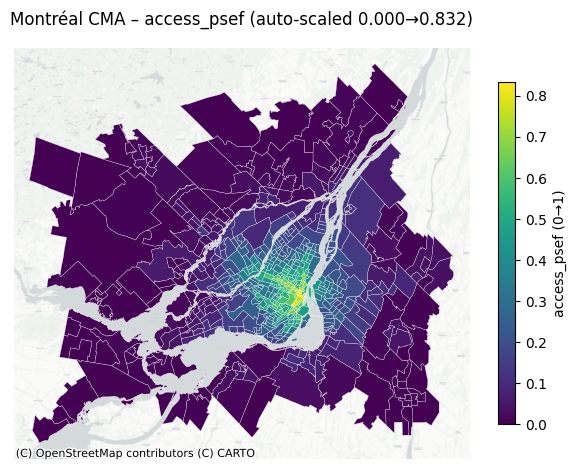

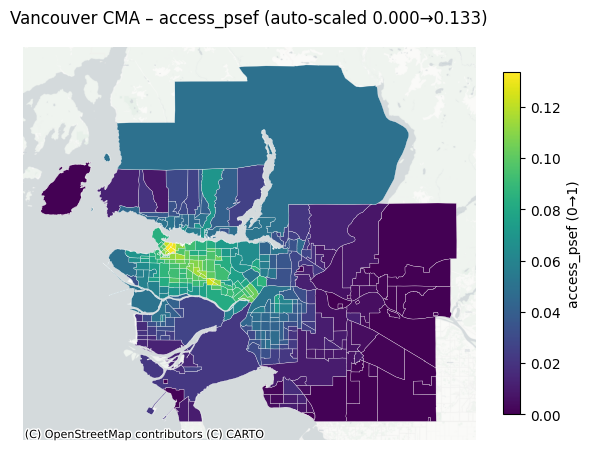

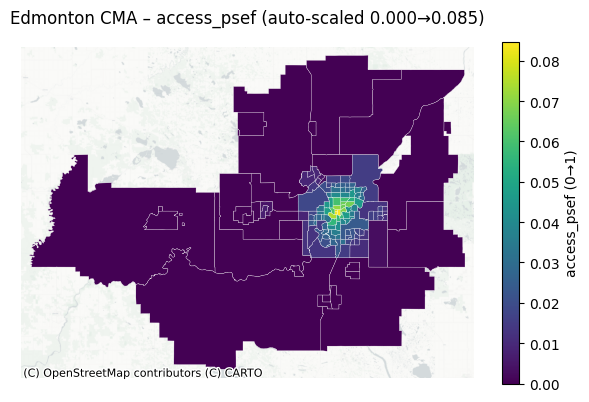

In [82]:
# 1) Your full Canada ADAs GeoDataFrame, with all access_* fields merged in
#    let's call it `gdf_can`.
#    Make sure it's already in EPSG:3857:

# 2) The CMAs we care about:
cities = ["Toronto", "Montréal", "Vancouver","Edmonton"]
service = "access_psef"   # or 'access_hf', 'access_srf', etc.

# 3) Loop and plot
for city in cities:
    # a) subset by CMA name
    cma = gdf_can[
        gdf_can["CMANAME_x"].str.contains(city, case=False, na=False)
    ].copy()
    if cma.empty:
        print(f"⚠️ No ADAs found for {city}")
        continue

    # b) get its bounds, pad a little
    minx, miny, maxx, maxy = cma.total_bounds
    pad = 5000  # metres
    bbox = (minx - pad, miny - pad, maxx + pad, maxy + pad)

    # c) find that CMA’s own min/max on the service
    vmin, vmax = cma[service].min(), cma[service].max()

    # d) plot
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    cma.plot(
        column=service,
        cmap="viridis",
        vmin=vmin, vmax=vmax,
        legend=True,
        legend_kwds={"label": f"{service} (0→1)", "shrink":0.6},
        edgecolor="white", linewidth=0.2,
        ax=ax
    )
    # lock to our padded CMA extent
    ax.set_xlim(bbox[0], bbox[2])
    ax.set_ylim(bbox[1], bbox[3])

    # add basemap
    cx.add_basemap(
        ax,
        source=cx.providers.CartoDB.Positron,
        crs=cma.crs,
        zoom=12
    )

    ax.set_title(f"{city} CMA – {service} (auto-scaled {vmin:.3f}→{vmax:.3f})")
    ax.axis("off")
    plt.tight_layout()
    plt.show()